In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno

pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# ? 를 제외한 이상치만 수정시작

## Warehouse_block

In [4]:
# Mode_of_Shipment - shipzk 등등 ship 으로 변경
# Cost_of_the_Product - 9999이상치 제거 후 중앙값으로 대체
# Customer_rating - 평점 99 2개 평균 평점으로 대체
# Product_importance - 데이터 카테고리 이름 오타 수정

In [5]:
# Warehouse_block 컬럼네임 뒤에 띄어쓰기 제거
train.rename(columns={'Warehouse_block ': 'Warehouse_block'}, inplace=True)
test.rename(columns={'Warehouse_block ': 'Warehouse_block'}, inplace=True)


## Mode_of_Shipment

In [6]:
# 데이터들 첫 글자 띄어쓰기 수정 Flightzk -> Flight 로 통일
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Shipzk', 'Ship')
test['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Shipzk', 'Ship')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Flightzk', 'Flight')
test['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Flightzk', 'Flight')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Roadzk', 'Road')
test['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Roadzk', 'Road')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Road', 'Road')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Ship', 'Ship')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Flight', 'Flight')
test['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Road', 'Road')
test['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Ship', 'Ship')
test['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Flight', 'Flight')

## Customer_rating

In [7]:
# max 에서 99 이상치 총 2개 

# ? 값중에 답이 1인 개수
len(train[(train['Customer_rating'] == 99) & (train['Reached.on.Time_Y.N'] == 1)])
# 중앙값으로 대체
median_cost = train['Customer_rating'].median()
train['Customer_rating'].replace(99, median_cost, inplace=True)
# test에 99 인값은 0
test['Customer_rating'].replace(99, median_cost, inplace=True)

## Cost_of_the_Product  

In [8]:
# Cost_of_the_Product 9999 이상치 3개 중앙값 대체 
median_cost = train['Cost_of_the_Product'].median()
train['Cost_of_the_Product'].replace(9999, median_cost, inplace=True)
test['Cost_of_the_Product'].replace(9999, median_cost, inplace=True)
# Cost_of_the_Product 3 개중  2개는 정답 1개는 오답
# 3개의 값을 제일 정답에 가까운 값 100에 배정
len(train[(train['Cost_of_the_Product'] == 9999) & (train['Reached.on.Time_Y.N'] == 1)])
train[train['Cost_of_the_Product'] == 9999].replace('?', 100, inplace=True)
# test에는 0
len(test[test['Cost_of_the_Product'] == 9999])

# Cost_of_the_Product

0

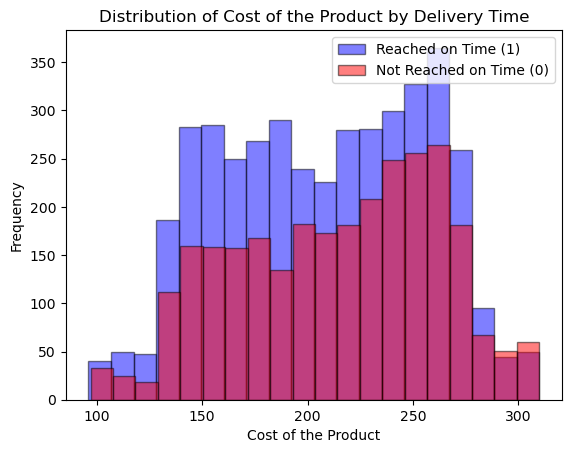

In [9]:
import matplotlib.pyplot as plt

# 'Reached.on.Time_Y.N'이 1이고 'Cost_of_the_Product' 열의 값들
reached_on_time = train[train['Reached.on.Time_Y.N'] == 1]['Cost_of_the_Product']

# 'Reached.on.Time_Y.N'이 0이고 'Cost_of_the_Product' 열의 값들
not_reached_on_time = train[train['Reached.on.Time_Y.N'] == 0]['Cost_of_the_Product']

# 히스토그램 생성
plt.hist(reached_on_time, bins=20, color='blue', edgecolor='black', alpha=0.5, label='Reached on Time (1)')
plt.hist(not_reached_on_time, bins=20, color='red', edgecolor='black', alpha=0.5, label='Not Reached on Time (0)')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of Cost of the Product by Delivery Time')
plt.xlabel('Cost of the Product')
plt.ylabel('Frequency')

# 범례 추가
plt.legend(loc='upper right')

# 그래프 표시
plt.show()


### Product_importance

In [10]:
# 컬럼 네임 수정
train['Product_importance'].replace('mediumm', 'medium', inplace=True)
train['Product_importance'].replace('loww', 'low', inplace=True)
train['Product_importance'].replace('highh', 'high', inplace=True)
test['Product_importance'].replace('mediumm', 'medium', inplace=True)
test['Product_importance'].replace('loww', 'low', inplace=True)
test['Product_importance'].replace('highh', 'high', inplace=True)

In [11]:
# 카테고리 순서 변경
train['Product_importance'] = train['Product_importance'].map({'low': 'high', 'medium': 'medium', 'high': 'low', '?': '?'})


### 필요 없는 컬럼 제거

In [12]:
train.drop('ID', axis=1, inplace=True)
train.drop('Gender', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)
test.drop('Gender', axis=1, inplace=True)


In [13]:
test.to_csv('test_last_1.csv', index=False)
train.to_csv('train_last_1.csv', index=False)

In [14]:
train['Customer_care_calls'].describe()

count    5423.000000
mean        4.054582
std         1.131019
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Customer_care_calls, dtype: float64